# Step 0 — Anchor-Start + Random Walk (Baseline)

**Goal:**  
All customers (agents) start at the anchor store and move randomly through the mall network.  
We record how many times each node is visited (`footfall`) and store the results as a baseline.

**Why Step 0 matters**
- Provides a **baseline** before adding complex rules (thresholds, probabilities, stay-time).  
- Checks simulator **stability** (`n_agents × (steps + 1)` = total footfall).  
- Ensures our graph + agent-update loop works correctly.

**Key assumptions**
- All agents start at one anchor (`A0`).  
- Network = *Erdős–Rényi* random graph.  
- Movement is **weighted random**: anchor = 3 × weight, tenant = 1 × weight, staying allowed.  
- Node labels:  
  - `role` = anchor / tenant  
  - `category` = similar / different

In [ ]:
import sys, os
sys.path.append("src")
sys.path.append("utils")

# Install dependencies if missing
# !pip install -r requirements.txt

In [ ]:
import sys, os

PROJECT_ROOT = os.path.abspath("..") 
sys.path.append(PROJECT_ROOT)
sys.path.append(os.path.join(PROJECT_ROOT, "src"))
sys.path.append(os.path.join(PROJECT_ROOT, "utils"))

print("Path added:", PROJECT_ROOT)

Path added: /workspaces/Modeling


In [ ]:
from utils import ensure_dir
from utils.random_tools import set_seed
from utils.plotting import set_palette

set_seed(42)
set_palette(style='whitegrid', context='talk', palette='Set2')

[Seaborn] style=whitegrid, context=talk, palette=Set2


In [ ]:
from asm.simulate_step0 import simulate, Params
import pandas as pd

p = Params()
p.count_t0 = False
df, A0 = simulate(p)

print("count_t0:", p.count_t0)
print("Start anchor:", A0)
print(df.head())

count_t0: False
Start anchor: 8
   node    role   category  footfall
0     0  tenant    similar        58
1     1  tenant  different        62
2     2  tenant    similar        40
3     3  tenant    similar        33
4     4  tenant    similar        35


In [ ]:
total = df["footfall"].sum()
expected = Params.n_agents * (Params.steps + int(Params.count_t0))

print(f"Total footfall: {total} | Expected: {expected}")
assert total == expected, "Total footfall mismatch!"
print("✅ Simulation totals are correct.")

anchor_avg = df[df.role == "anchor"].footfall.mean()
tenant_avg = df[df.role == "tenant"].footfall.mean()
print(f"Anchor avg: {anchor_avg:.2f} | Tenant avg: {tenant_avg:.2f}")

df.sort_values("footfall", ascending=False).head(10)

Total footfall: 1000 | Expected: 1000
✅ Simulation totals are correct.
Anchor avg: 124.00 | Tenant avg: 46.11


,node,role,category,footfall
8,8,anchor,similar,124
9,9,tenant,different,80
10,10,tenant,different,78
6,6,tenant,similar,68
19,19,tenant,similar,63
1,1,tenant,different,62
0,0,tenant,similar,58
16,16,tenant,different,53
18,18,tenant,similar,53
7,7,tenant,different,50


[Saved] data/outputs/figs/footfall_step0.png


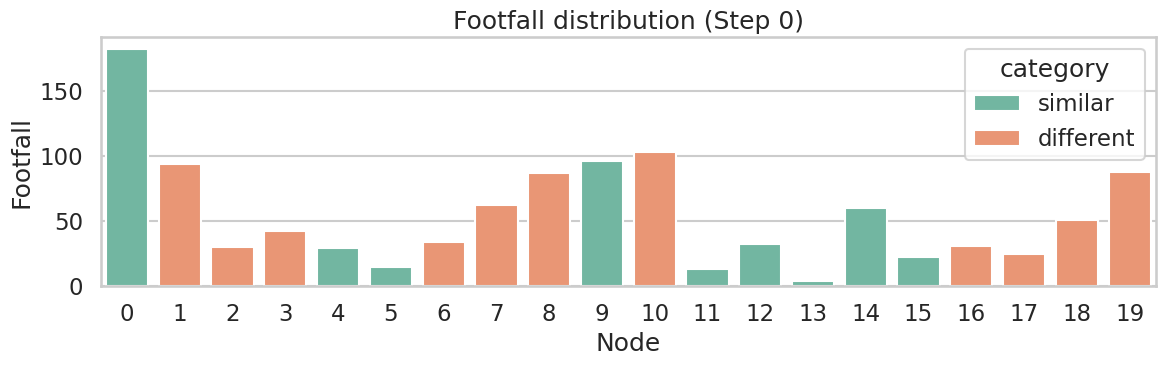

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))
sns.barplot(data=df.sort_values("node"), x="node", y="footfall", hue="category")
plt.title("Footfall distribution (Step 0)")
plt.xlabel("Node")
plt.ylabel("Footfall")

ensure_dir("data/outputs/figs")
plt.tight_layout()
plt.savefig("data/outputs/figs/footfall_step0.png", dpi=150)
print("[Saved] data/outputs/figs/footfall_step0.png")
plt.show()

## Summary
- The Step 0 baseline works correctly (expected total footfall confirmed).  
- Anchor nodes naturally show higher visitation even with pure random movement.  
- These results will serve as the **reference point** for later steps:

| Step | New concept | Added parameters |
|------|--------------|------------------|
| 1 | Threshold rule | `theta_same` |
| 2 | Probabilistic move/stay | `p_move_below`, `p_stay_anchor` |
| 3 | Time-left distribution | `time_left_min`, `time_left_max` |
| 4 | Purchase events | `purchase_prob` |

Next: introduce the **Threshold Rule (θ_same)** in *Step 1* to model same-category preference.